# 복습
- 데이터 = 테이블
- 종류 : 카테고리, 연속된 숫자
- 시각화(현미경) => 종류에 따라 적절히
- ML => 사이킷런
    - 3단계 : 생성 => 훈련(fit) => 예측(predict), 검증(score)
- ML 전에 데이터를 가공
    - 스케일링, 인코딩 ...

# ML의 분류 모델
- target 데이터가 있냐 없냐
    - 지도학습, 비지도학습
- target 데이터의 종류
    - 카테고리 => 분류모델(Classification)
    - 연속된 숫자 => 회귀모델(Regressor)

## 데이터 읽어오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\train.csv')
test_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\test.csv')

In [9]:
# target => Survived => 분류문제
# feature
# 카테고리 : Pclass, Sex, Embarked  =>  숫자로 바꿔줌(인코딩)
# 연속된숫자 : Age, Fare            =>  스케일을 맞춰줌(스케일링)
# 데이터가 아닌 것들 : Name, Ticket, Cabin, SibSp, Parch => 데이터로 변형

train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## EDA & 결측값 채우기
- 다양하게 시각화를 해서 데이터의 특징을 파악

In [15]:
# 결측 데이터
# 결측 데이터가 얼마나 있나? => 집계

train_df.isna().sum() / len(train_df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [16]:
test_df.isna().sum() / len(test_df) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

### Embarked 결측값 채우기

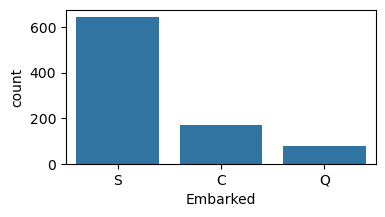

In [18]:
plt.figure(figsize=(4, 2))
sns.countplot(data=train_df, x='Embarked')
plt.show()

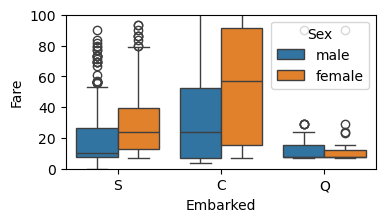

In [21]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=train_df, x='Embarked', y='Fare', hue='Sex')
plt.ylim( [0, 100] )
plt.show()

In [22]:
# Embarked가 결측값인 것을 보자
train_df[ train_df['Embarked'].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
# 최종적으로 결측값을 'C'라고 하기호 함!
# .loc[인덱스 조건, 컬럼]

train_df.loc[ train_df['Embarked'].isna(), 'Embarked' ] = 'C'

### Age 결측값 채우기

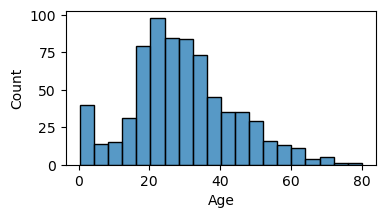

In [28]:
plt.figure(figsize=(4, 2))
sns.histplot(data=train_df, x='Age')
plt.show()

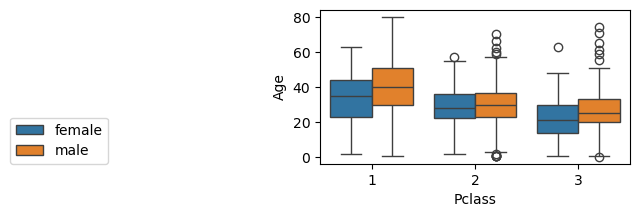

In [34]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=train_df, x='Pclass', y='Age', hue='Sex')
plt.legend(loc=(-1, 0))
plt.show()

In [41]:
temp = train_df.groupby( ['Pclass', 'Sex'] )['Age'].mean()

for ix in temp.index:
    cond1 = train_df['Age'].isna()
    cond2 = train_df['Pclass'] == ix[0]
    cond3 = train_df['Sex'] == ix[1]
    train_df.loc[ cond1 & cond2 & cond3, 'Age' ] = temp[ix]

    cond1 = test_df['Age'].isna()
    cond2 = test_df['Pclass'] == ix[0]
    cond3 = test_df['Sex'] == ix[1]
    test_df.loc[ cond1 & cond2 & cond3, 'Age' ] = temp[ix]

In [43]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Fare 결측값 채우기

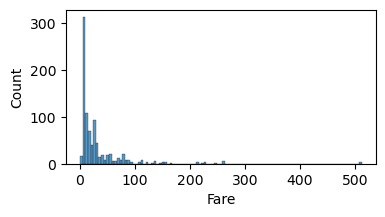

In [44]:
plt.figure(figsize=(4, 2))
sns.histplot(data=train_df, x='Fare')
plt.show()

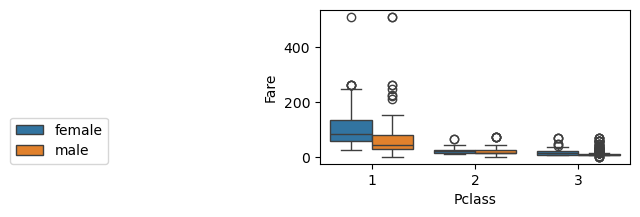

In [45]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=train_df, x='Pclass', y='Fare', hue='Sex')
plt.legend(loc=(-1, 0))
plt.show()

In [47]:
train_df.groupby(['Pclass', 'Sex'])['Fare'].median()

Pclass  Sex   
1       female    82.66455
        male      41.26250
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500
Name: Fare, dtype: float64

In [48]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [50]:
test_df.loc[ test_df['Fare'].isna() ,  'Fare' ] = 7.925

## Feature Engineering
- 특성값들을 컴퓨터가 이해하기 쉽게 가공
- 데이터가 아닌것들에서 데이터를 추출
    - 'Name','SibSp',  'Parch', 'Ticket 
- 숫자 데이터 => 스케일링
    -  'Age', 'Fare'
- 카테고리 => 인코딩
    -  'Pclass', 'Sex', 'Embarked'

### 데이터가 아닌 것들에서 데이터를 추출
- 'Name', 'SibSp', 'Parch', 'Ticket'

In [62]:
# Name => 겹치는 정보... => 버림

def get_name(x):
    return x.split(', ')[1].split('.')[0]

train_df['Name2'] = train_df['Name'].apply(get_name)

In [64]:
train_df['Name2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
# Ticket => 추출할 거 없으니 버림

train_df['Ticket']

In [67]:
# 'SibSp', 'Parch' => 'Family'는 연속된 숫자로

train_df['Family'] = train_df['SibSp'] + train_df['Parch']

In [68]:
train_df['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

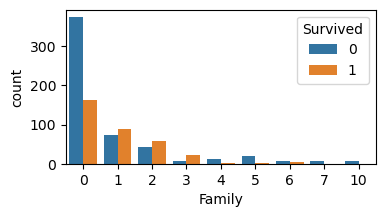

In [70]:
plt.figure(figsize=(4, 2))
sns.countplot(data=train_df, x='Family', hue='Survived')
plt.show()

### 스케일링
- 숫자 데이터의 크기를 맞춰줌
- standard scailing
- min-max scailing
- 일관성과 편의성을 위해서 직접 계산하는 것이 아니라 사이킷런 이용
- 아웃라이어나 심하게 스큐된 데이터는 처리를 먼저 해야 함 => log 변환

In [74]:
train_df['Fare_log'] = np.log1p( train_df['Fare'] )
test_df['Fare_log'] = np.log1p( test_df['Fare'] )

In [81]:
from sklearn.preprocessing import StandardScaler
# 1. 스케일러를 생성
sc = StandardScaler()
# 2. fit
sc.fit( train_df[ ['Age', 'Fare_log'] ]  )
# 3. 실제 변형(transform)
X = pd.DataFrame( sc.transform( train_df[ ['Age', 'Fare_log'] ]  ), 
                 columns=['Age', 'Fare_log'] )
test_X = pd.DataFrame( sc.transform( test_df[ ['Age', 'Fare_log'] ]  ), 
                 columns=['Age', 'Fare_log'] )

### 인코딩
- 원핫인코딩

In [95]:
from sklearn.preprocessing import OneHotEncoder

# 1. 모델 생성
one_hot = OneHotEncoder(drop='first', sparse_output=False) # drop='first' : 
# 2. fit
one_hot.fit( train_df[ ['Pclass', 'Sex', 'Embarked'] ]  )
# 3. transform
X[ one_hot.get_feature_names_out() ] = one_hot.transform( train_df[ ['Pclass', 'Sex', 'Embarked'] ]  )
test_X[one_hot.get_feature_names_out()] = one_hot.transform(test_df[ ['Pclass', 'Sex', 'Embarked'] ]  )

## 여러가지 모델들
### KNN
- 하이퍼 파라미터 세팅
- 생성
- 훈련(fit)
- 검증(score), 예측(predict)

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [98]:
y = train_df['Survived']
train_x, valid_x, train_y, valid_y = train_test_split( X, y,
                                                      test_size=0.3, 
                                                      random_state=16,
                                                      stratify=y )

In [100]:
# KNN 하이퍼 파라미터 찾기
# => 7로 찾음
score_list = []
for k in range(1, 51):
    knn = KNeighborsClassifier( n_neighbors=k )
    score = cross_val_score(knn, train_x, train_y, cv=5).mean()
    score_list.append(score)

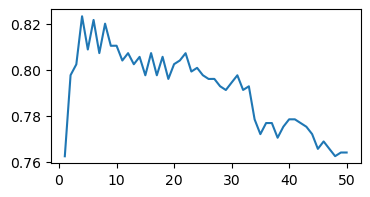

In [102]:
plt.figure(figsize=(4, 2))
plt.plot(range(1, 51), score_list)
plt.show()

In [106]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_x, train_y)
knn.score(valid_x, valid_y)

0.7873134328358209

In [ ]:
# 제출
knn_result = test_df[['PassengerId']].copy()
knn_result['Survived'] = knn.predict(test_X)
knn_result.to_csv( r'파일경로\파일명.csv', index=False )

### Tree
- 데이터(target)가 가장 순수해 지는 방향으로 feature 선택해서 데이터를 2개로 나눔
- 위를 반복
- 설명력이 좋음!

In [130]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

In [118]:
# 하이퍼 파라미터
params = {'max_depth' : [3, 5, 10, 15, 20],
          'min_samples_leaf': [1, 10, 20, 30]}

grid_tree = GridSearchCV( DecisionTreeClassifier(), params, cv=5  )
grid_tree.fit( train_x, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 10, 20, 30]})

In [ ]:
cv_result = pd.DataFrame( grid_tree.cv_results_['params'])
cv_result['score'] = grid_tree.cv_results_['mean_test_score']
pd.pivot_table( cv_result, columns='max_depth', index='min_samples_leaf' )

In [128]:
# 검증
grid_tree.score( valid_x, valid_y )

0.7985074626865671

In [ ]:
# 예측 => csv로 제출
grid_tree.predict( test_X  )

In [ ]:
plt.figure(dpi=400)
plot_tree( grid_tree.best_estimator_, feature_names=train_x.columns )
plt.show()

In [136]:
grid_tree.best_estimator_.feature_importances_

array([0.0698965 , 0.06017317, 0.        , 0.16151896, 0.66395523,
       0.        , 0.04445613])

In [137]:
grid_tree.best_estimator_.feature_names_in_

array(['Age', 'Fare_log', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'], dtype=object)

### Random Forest
- 트리 문제점을 해결
1. 오버피팅       => 약한트리
2. 다양성 떨어짐  => feature 랜덤하게 선택, 각각의 나무에 조금씩 다른 데이터로 훈련 

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {'max_depth':[3, 10, 15], 'min_samples_leaf':[1, 10, 20, 30]}

grid_rf = GridSearchCV( RandomForestClassifier(random_state=16), params, cv=5 )
grid_rf.fit(train_x, train_y)

In [143]:
cv_result = pd.DataFrame( grid_rf.cv_results_['params'])
cv_result['score'] = grid_rf.cv_results_['mean_test_score']
pd.pivot_table( cv_result, columns='max_depth', index='min_samples_leaf' )

score                    
max_depth               3         10        15
min_samples_leaf                              
1                 0.810542  0.808942  0.797677
10                0.804129  0.813742  0.813742
20                0.789716  0.799290  0.799290
30                0.780142  0.775316  0.775316

In [144]:
grid_rf.score(valid_x,valid_y)

0.7985074626865671

In [151]:
result_rf = test_df[['PassengerId']].copy()
result_rf['Survived'] = grid_rf.predict(test_X)
result_rf.to_csv(r'여러분의 저장경로/파일명.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
- 데이터 읽어오기
    - target, feature
    - 연속된 숫자, 카테고리
- EDA(탐색적 데이터 분석)
    - 다양한 시각화
    - 결측 데이터
- Feaure Engineering
    - 데이터가 아닌 것에서 데이터 추출
    - 숫자 => 스케일링
    - 카테고리 => 인코딩
- 여러가지 모델
    - 하이퍼 파라미터 => 그리드서치
    - 검증
    - 예측